# Exploratory Analysis of Medical Expenses

Neste projeto seu trabalho é preparar e analisar o dataset para modelagem preditiva, quando iremos prever o custo de despesas médicas para uma amostra da população de pacientes de um hospital, considerando o hábito de fumar, idade, sexo, IMC e região. 

O dataset fornecido a você apresenta problemas que devem ser resolvidos. Você encontrará algumas perguntas que devem ser respondidas através de análise exploratória e visualização de dados.

Dicionário de Dados:
    
- idade: idade do paciente

- sexo: sexo do paciente (feminino, masculino)

- IMC: índice de massa corporal, usando a razão entre altura e peso (idealmente 18,5 a 24,9)

- filhos: número de filhos do paciente

- fumante: se fuma ou não

- região: a área residencial do paciente.

- custo_medico_anual: custo médico anual do paciente em uma clínica medica (variável alvo)

Para guiá-lo pelo projeto, deixamos comentários nas células abaixo com sugestões de atividades que deve ser realizadas. 

In [1]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
#%matplotlib inline

pd.set_option('display.float_format', lambda x: '%.5f' % x)


from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)



In [2]:
# Carregando o dataset
dataset = pd.read_csv('dados/custos_seguro.csv')

In [3]:
# Visualizando alguns registros
dataset.head() 

,idade,sexo,imc,filhos,fumante,regiao,custo_medico_anual
0,19,feminino,27.90000,0,yes,sudeste,16884.92400
1,18,masculino,33.77000,1,no,sul,1725.55230
2,28,masculino,33.00000,3,no,sul,4449.46200
3,33,masculino,nan,0,no,nordeste,21984.47061
4,32,masculino,28.88000,0,no,nordeste,3866.85520


In [4]:
# Visualizando os tipos de dados
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
idade                 1338 non-null int64
sexo                  1338 non-null object
imc                   1325 non-null float64
filhos                1338 non-null int64
fumante               1338 non-null object
regiao                1338 non-null object
custo_medico_anual    1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# Visualizando o total de linhas por coluna
dataset.shape

(1338, 7)

In [6]:
#
dataset.nunique()

idade                   47
sexo                     2
imc                    547
filhos                   6
fumante                  2
regiao                   4
custo_medico_anual    1337
dtype: int64

In [7]:
# Verifique se há valores ausentes

def check_missing(dataset, display = 5):
    temp_df = dataset.copy()
    df_nan = (temp_df.isnull().sum() / len(temp_df)) * 100
    missing_data = pd.DataFrame({'Missing n': temp_df.isnull().sum(),'% Missing' :df_nan})
    if missing_data['Missing n'].sum() == 0:
        return print('Great! There are no missing values in this dataset.')
    else:
        return missing_data.sort_values('% Missing', ascending = False).head(display)
    
check_missing(dataset)

,Missing n,% Missing
imc,13,0.97160
idade,0,0.00000
sexo,0,0.00000
filhos,0,0.00000
fumante,0,0.00000


In [8]:
dataset['imc'].fillna(dataset['imc'].mean(), inplace=True)

In [9]:
dataset.describe()

,idade,imc,filhos,custo_medico_anual
count,1338.00000,1338.00000,1338.00000,1338.00000
mean,39.20703,30.69302,1.09492,13270.42227
std,14.04996,6.07605,1.20549,12110.01124
min,18.00000,15.96000,0.00000,1121.87390
25%,27.00000,26.33625,0.00000,4740.28715
50%,39.00000,30.49500,1.00000,9382.03300
75%,51.00000,34.65625,2.00000,16639.91251
max,64.00000,53.13000,5.00000,63770.42801


In [10]:
# Convertendo todas as variáveis para o tipo numérico inteiro a fim de calcular as correlações
dataset['sexo_ob'] = dataset['sexo'].astype('category')
dataset['fumante_ob'] = dataset['fumante'].astype('category')
dataset['regiao_ob'] = dataset['regiao'].astype('category')
dataset['sexo'] = dataset['sexo_ob'].cat.codes
dataset['fumante'] = dataset['fumante_ob'].cat.codes
dataset['regiao'] = dataset['regiao_ob'].cat.codes

In [11]:
# Visualizando os tipos de dados
dataset.dtypes

idade                    int64
sexo                      int8
imc                    float64
filhos                   int64
fumante                   int8
regiao                    int8
custo_medico_anual     float64
sexo_ob               category
fumante_ob            category
regiao_ob             category
dtype: object

## Quais variáveis tem maior correlação com o custo_medico_anual?

Construa um heatmap para mostrar suas conclusões.

In [12]:
# Convertendo todas as variáveis para o tipo inteiro a fim de calcular as correlações
from sklearn.preprocessing import LabelEncoder

dataset_encoded = dataset.copy()
dataset_encoded[['idade','imc','filhos']] = dataset_encoded[['idade','imc','filhos']].apply(LabelEncoder().fit_transform)

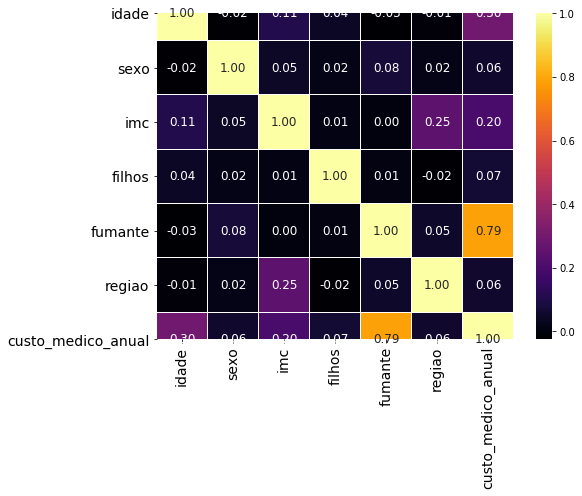

In [13]:
sns.heatmap(dataset_encoded.corr(), annot=True, cmap='inferno', cbar=True, linewidths=0.2, annot_kws={'size':12}, fmt='.2f')
fig = plt.gcf()
fig.set_size_inches(8,6)
#plt.figure(figsize= (14,14))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

## Entre fumantes e não fumantes, qual grupo tem maior custo_medico_anual?

Dica: Um facetgrid do Seaborn com dois plots univariados (de uma única variável com dois valores), ajuda a visualizar a resposta.

In [39]:
import plotly.figure_factory as ff

# Add histogram data
x1 = dataset.loc[dataset.fumante_ob=='no','custo_medico_anual']
x2 = dataset.loc[dataset.fumante_ob=='yes','custo_medico_anual']
# Group data together
hist_data = [x1, x2]

group_labels = ['no', 'yes']

# Create distplot with custom bin_size
fig = ff.create_distplot(hist_data, group_labels,bin_size=2000)
fig.show()

In [38]:
fig = px.histogram(dataset, x="custo_medico_anual", 
                   color='fumante_ob',
                   hover_data=dataset.columns)

fig.show()

In [43]:
x0 = dataset.loc[dataset.fumante_ob=='no','custo_medico_anual']
x1 = dataset.loc[dataset.fumante_ob=='yes','custo_medico_anual']

fig = go.Figure()
fig.add_trace(go.Histogram(x=x0)) #, histnorm='probability'))
fig.add_trace(go.Histogram(x=x1)) #, histnorm='probability'))

# Overlay both histograms
fig.update_layout(barmode='overlay',legend=dict(
        x=1.0,
        y=0.5))
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()


In [27]:
fig = px.histogram(dataset, x="custo_medico_anual", 
                   facet_col= 'fumante', #color='fumante'#, marginal="violin",
                   hover_data=dataset.columns)
fig.show()

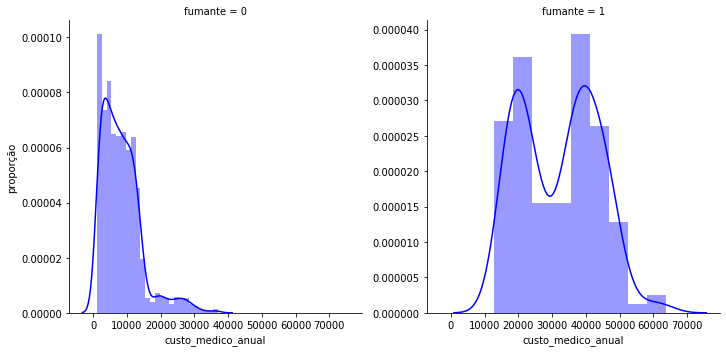

In [28]:
fig1 = sns.FacetGrid(dataset, col = "fumante", height = 5, sharey = False, sharex = True)
fig1.map(sns.distplot, "custo_medico_anual", color = 'b');
fig1.set_axis_labels("custo_medico_anual", "proporção");

## Qual faixa etária apresenta maior custo_medico_anual?

Construa uma visualização para suportar suas conclusões.

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')

dataset_transformed = dataset.copy()
dataset_transformed['idade'] = est.fit_transform(np.array(dataset_encoded['idade']).reshape(-1,1))

sns.boxplot(x = 'idade', y = 'custo_medico_anual', data = dataset_transformed);
plt.show()

In [ ]:
dataset_transformed[['idade','custo_medico_anual']].groupby(['idade'])['custo_medico_anual'].agg(['mean','sum'])

## A proporção de fumantes por sexo é semelhante ou precisamos balancear esses dados?

Construa uma visualização para suportar suas conclusões.

In [29]:
fig = px.histogram(dataset, x='fumante', color='sexo')
layout = go.Layout(
    title = 'Distribuicao de fumantes por sexo',
    yaxis=dict(
        title='Count',
    ),
    xaxis=dict(
        title='Fumante'
    ),
    boxmode='group'
)
fig.layout=layout
fig.show()

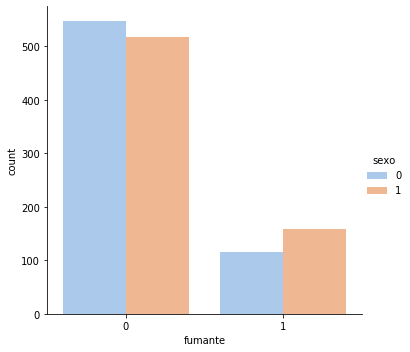

In [30]:
sns.catplot(x = "fumante", kind = "count", hue = 'sexo', data = dataset, palette = 'pastel');
plt.show()

## À medida que a idade do paciente aumenta o que acontece com o custo_medico_anual? Há diferença entre fumantes e não fumantes?

Construa uma visualização para suportar suas conclusões. A função lmplot do Seaborn pode responder as duas perguntas com facilidade.

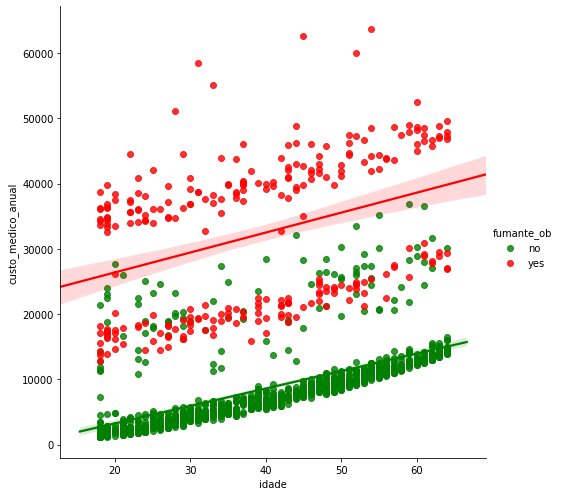

In [31]:
sns.lmplot(x = 'idade', y = 'custo_medico_anual', hue = 'fumante_ob', data = dataset, palette = dict(yes='r',no='g'), height=7);
plt.show()

In [ ]:
# Prepara as variáveis dummy (converte variáveis categóricas para representações numéricas com Label Encoding)
dataset = pd.get_dummies(dataset)
dataset.head()

In [ ]:
# Divide os dados em x e y
X = dataset.drop(columns = ['custo_medico_anual'])
y = dataset['custo_medico_anual']

In [ ]:
# Divide os dados em treino e teste

# Importa a função
from sklearn.model_selection import train_test_split

# Aplica a função com 10% dos dados para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

In [ ]:
# Cria a primeira versão do modelo de regressão linear

# Imports
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Cria o modelo e treina com os dados de teste
lr = LinearRegression().fit(X_train, y_train)

# Previsões nos dados de treino
lr_train_pred = lr.predict(X_train)

# Previsões nos dados de teste
lr_test_pred = lr.predict(X_test)

# Calcula as métricas
lr_train_mse = mean_squared_error(y_train, lr_train_pred)
lr_test_mse = mean_squared_error(y_test, lr_test_pred)

# Imprime o MSE (Mean Squared Error)
print('MSE nos dados de treino: {:.5}, MSE nos dados de teste: {:.5}'.format(lr_train_mse, lr_test_mse))

# Imprime o RMSE (Root Mean Squared Error)
print('RMSE nos dados de treino: {:.5}, RMSE nos dados de teste: {:.5}'.format(
    np.sqrt(np.absolute(lr_train_mse)), 
    np.sqrt(np.absolute(lr_train_mse))))
  
# Coeficiente R2
print('R2 nos dados de treino: {:.5}, R2 nos dados de teste: {:.5}'.format(
    r2_score(y_train, lr_train_pred),
    r2_score(y_test, lr_test_pred)))

In [ ]:
# Testando outro algoritmo (Método Ensemble)

# Import
from sklearn.ensemble import RandomForestRegressor

# Cria e treina o modelo
rfr = RandomForestRegressor(n_estimators = 50).fit(X_train, y_train)

# Previsões em treino e teste
rfr_train_pred = rfr.predict(X_train)
rfr_test_pred = rfr.predict(X_test)

# Calcula as métricas em treino e meste
rfr_train_mse = mean_squared_error(y_train,rfr_train_pred)
rfr_test_mse = mean_squared_error(y_test,rfr_test_pred)

# Imprime o MSE (Mean Squared Error)
print('MSE nos dados de treino: {:.5}, MSE nos dados de teste: {:.5}'.format(rfr_train_mse, rfr_test_mse))

# Imprime o RMSE (Root Mean Squared Error)
print('RMSE nos dados de treino: {:.5}, RMSE nos dados de teste: {:.5}'.format(
    np.sqrt(np.absolute(rfr_train_mse)), 
    np.sqrt(np.absolute(rfr_train_mse))))
    
# Coeficiente R2
print('R2 nos dados de treino: {:.5}, R2 nos dados de teste: {:.5}'.format(
    r2_score(y_train, rfr_train_pred),
    r2_score(y_test, rfr_test_pred)))

Esta é uma previsão decente, podemos assumir que o RandomForest apresenta um melhor resultado com uma pontuação R2 de 97% nos dados de treinamento e 82% nos dados de teste (nunca vistos antes). Ele também tem o menor valor RMSE.

# Fim